<a href="https://colab.research.google.com/github/dangcaptkd2/PracticeWithTensorFlow/blob/main/Multiclass_classification_on_Stack_Overflow_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip and explore data

In [75]:
import tarfile
file = tarfile.open('/content/stack_overflow_16k.tar.gz', 'r:gz')
file.extractall()

In [76]:
sample_file = '/content/train/csharp/0.txt'
with open(sample_file) as f:
  print(f.read())

"how to pause loop while time is ticking i have made a timer where i can set time i want to wait and then do something..so this is my short timer func:..private void sleep(int interval, action action).{.    system.windows.forms.timer mytimer = new system.windows.forms.timer();.    mytimer.interval = interval; //interval is in ms   .    mytimer.start();.    mytimer.tick += (s, e) =&gt;.    {.        action();.        mytimer.stop();.    };.}...and im using this timer in loop:..foreach (string word in words).{.   sleep(5000, ()=&gt; myaction());                                           .}...without loop timer is great but in loop it wont work because loop wont stop and wait for those 5secs. it do all stuff imediately and starts timer again and again too fast...so what im trying to find out is how to make my loop wait until time runs out and myaction() is executed. im working on forms application so all threadin sleeps wont work here. also i tried all other timers but they used too much 

In [77]:
import matplotlib.pyplot as plt
import os
import string
import tensorflow as tf
import re

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [78]:
print('Train dataset:')
print('c#:',len(os.listdir('/content/train/csharp')))
print('java:',len(os.listdir('/content/train/java')))
print('javascript:',len(os.listdir('/content/train/javascript')))
print('python',len(os.listdir('/content/train/python')))

Train dataset:
c#: 2000
java: 2000
javascript: 2000
python 2000


In [79]:
print('Test dataset:')
print('c#:',len(os.listdir('/content/test/csharp')))
print('java:',len(os.listdir('/content/test/java')))
print('javascript:',len(os.listdir('/content/test/javascript')))
print('python',len(os.listdir('/content/test/python')))

Test dataset:
c#: 2000
java: 2000
javascript: 2000
python 2000


# Prepare the data for training

In [80]:
batch_size = 32
seed = 69

raw_train = tf.keras.preprocessing.text_dataset_from_directory('/content/train', batch_size=batch_size, 
    validation_split=0.2, subset='training', seed=seed)

raw_valid = tf.keras.preprocessing.text_dataset_from_directory('/content/train', batch_size=batch_size, 
    validation_split=0.2, subset='validation', seed=seed)

raw_test = tf.keras.preprocessing.text_dataset_from_directory('/content/train', batch_size=batch_size)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [81]:
for text_batch, label_batch in raw_train.take(1):
  for i in range(3):
    print('question:', text_batch.numpy()[i])
    print('label:', label_batch.numpy()[i])

question: b'"docvecs.most_similar() not working properly. won\'t find docs so, i\'m new to blank, and this is one of the first problems i\'m solving. i realise i\'m in over my head a bit, but i really need this done (and i want to learn!)...i\'m trying to classify different aricles based on their product description. for this i\'m using gensim doc2vec, along with the usual pandas, numpy etc. ..i have a document of about 6000 unique product descriptions, with their respective article number. i have no difficulty reading the file, formatting and tokenizing it and removing stopwords etc. what is giving me a headache is the acutal model training. to set up the code i\'m using a part of the document with only 200 articles, so that the training doesn\'t take forever each time i get it wrong...i get results when using the model.most_similar(""word"") function (although they are not that great, which isn\'t strange for such a small sample). what bothers me is that i cannot get the model.docvec

In [82]:
raw_train.class_names

['csharp', 'java', 'javascript', 'python']

In [83]:
print('class 0:', raw_train.class_names[0])
print('class 1:', raw_train.class_names[1])
print('class 2:', raw_train.class_names[2])
print('class 3:', raw_train.class_names[3])

class 0: csharp
class 1: java
class 2: javascript
class 3: python


In [84]:
max_features = 5000
sequence_length = 500

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [93]:
# Make a text-only dataset (no labels) and call adapt
text_ds = raw_train.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [85]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [94]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", raw_train.class_names[first_label])
print("Vectorized review", vectorize_text(first_question, first_label))

Question tf.Tensor(b'"unusual transitionend script behavior hey guys have a look at the script below :: ..  function transitionend() {.    var el = document.createelement(\'bootstrap\')..    var transendeventnames = {.      webkittransition : \'webkittransitionend\',.      moztransition    : \'transitionend\',.      otransition      : \'otransitionend otransitionend\',.      transition       : \'transitionend\'.    }..    for (var name in transendeventnames) {.        console.log(name);.      if (el.style[name] !== undefined) {.        return { end: transendeventnames[name] }.      }.    }.    return false // explicit for ie8 (  ._.).  }..transitionend();...now when this script is run the following is printed to the console : ..""webkittransition"" .""moztransition""...now if i remove the if check inside the for loop and run the following script instead :: ..  function transitionend() {.    var el = document.createelement(\'bootstrap\')..    var transendeventnames = {.      webkittrans

In [95]:
print("450 ---> ",vectorize_layer.get_vocabulary()[450])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print(" 2 ---> ",vectorize_layer.get_vocabulary()[2])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

450 --->  save
 313 --->  sum
 2 --->  the
Vocabulary size: 5000


In [96]:
train_ds = raw_train.map(vectorize_text)
val_ds = raw_valid.map(vectorize_text)
test_ds = raw_test.map(vectorize_text)

In [97]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build model

In [106]:
embedding_dim = 16

In [107]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(4)])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 80,084
Trainable params: 80,084
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [109]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/50
200/200 [==============================] - 2s 9ms/step - loss: 1.3850 - accuracy: 0.2766 - val_loss: 1.3772 - val_accuracy: 0.3225
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 1.3742 - accuracy: 0.3635 - val_loss: 1.3601 - val_accuracy: 0.4013
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 1.3549 - accuracy: 0.4514 - val_loss: 1.3333 - val_accuracy: 0.4494
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 1.3243 - accuracy: 0.5063 - val_loss: 1.2982 - val_accuracy: 0.4850
Epoch 5/50
200/200 [==============================] - 1s 8ms/step - loss: 1.2847 - accuracy: 0.5480 - val_loss: 1.2569 - val_accuracy: 0.5219
Epoch 6/50
200/200 [==============================] - 2s 8ms/step - loss: 1.2397 - accuracy: 0.5867 - val_loss: 1.2125 - val_accuracy: 0.5431
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 1.1906 - accuracy: 0.6108 - val_loss: 1.1676 - val_accuracy: 0.5819
Epoch 

In [118]:
epochs = 50
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3602 - accuracy: 0.8952 - val_loss: 0.5929 - val_accuracy: 0.7919
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3550 - accuracy: 0.8963 - val_loss: 0.5919 - val_accuracy: 0.7931
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3470 - accuracy: 0.8978 - val_loss: 0.5904 - val_accuracy: 0.7944
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3409 - accuracy: 0.9033 - val_loss: 0.5902 - val_accuracy: 0.7944
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3334 - accuracy: 0.9030 - val_loss: 0.5887 - val_accuracy: 0.7937
Epoch 6/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3315 - accuracy: 0.9038 - val_loss: 0.5900 - val_accuracy: 0.7956
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3234 - accuracy: 0.9045 - val_loss: 0.5878 - val_accuracy: 0.7962
Epoch 

#Evaluate model

In [114]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8817
Loss:  0.3914448618888855
Accuracy:  0.8817499876022339


In [115]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

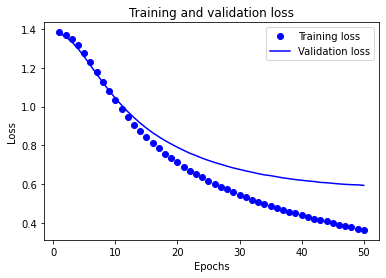

In [116]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

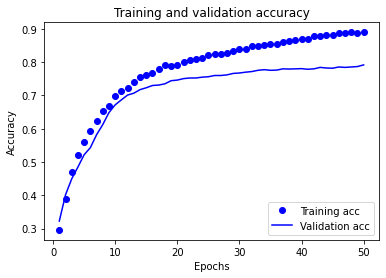

In [117]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [119]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

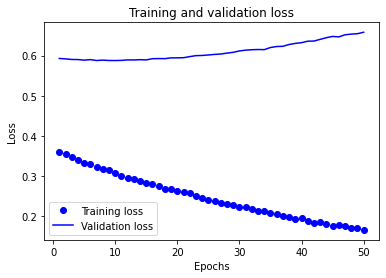

In [120]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

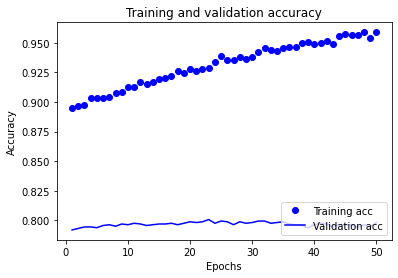

In [121]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()